In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

df=pd.read_excel("DataSet4_VirtualCareUtilization.xlsx",sheet_name="Data Set")

In [32]:
df.head(5)

In [33]:
df.info()

In [34]:
df.describe()

In [35]:
df.isnull().sum()

In [36]:
df.nunique()

In [37]:
# Data with new age categories

 df.drop(['Month', 'YYYYMM', 'Age Group Code (Patient)','Age Group (Patient)','Health Zone (Patient)', 
           'Health Zone (Physician)','Gender (Physician)', 'Gender (Patient)'],axis=1, inplace=True)


In [38]:
 df.drop(['Month', 'YYYYMM', 'Age Group Code (Patient)','Patient Age Group','Health Zone (Patient)', 
           'Health Zone (Physician)','Gender (Physician)', 'Gender (Patient)'],axis=1, inplace=True)


In [39]:
df = df[df["Physician Health Zone"]!="Unknown"]
df = df[df["Patient Health Zone"]!="Unknown"]
df = df[df["Patient Gender"]!="Not Specified"]

In [40]:
df['Age Group (Patient)'].value_counts()
for cols in df:
    print(df[cols].value_counts())

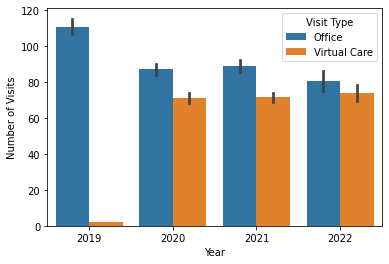

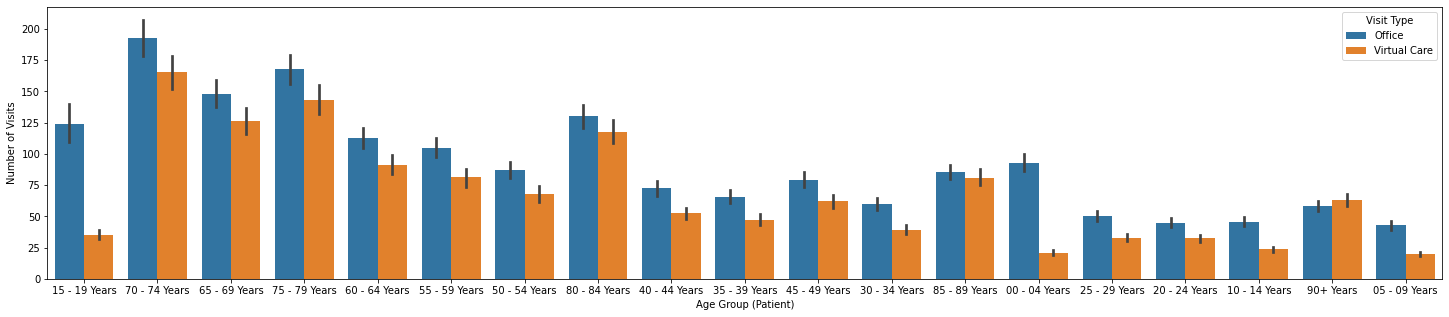

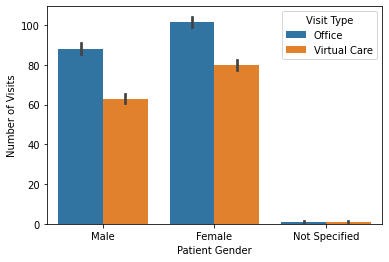

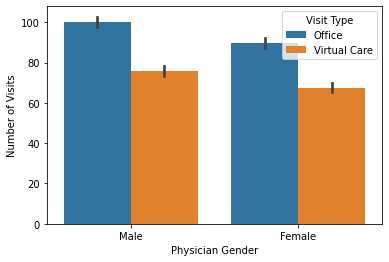

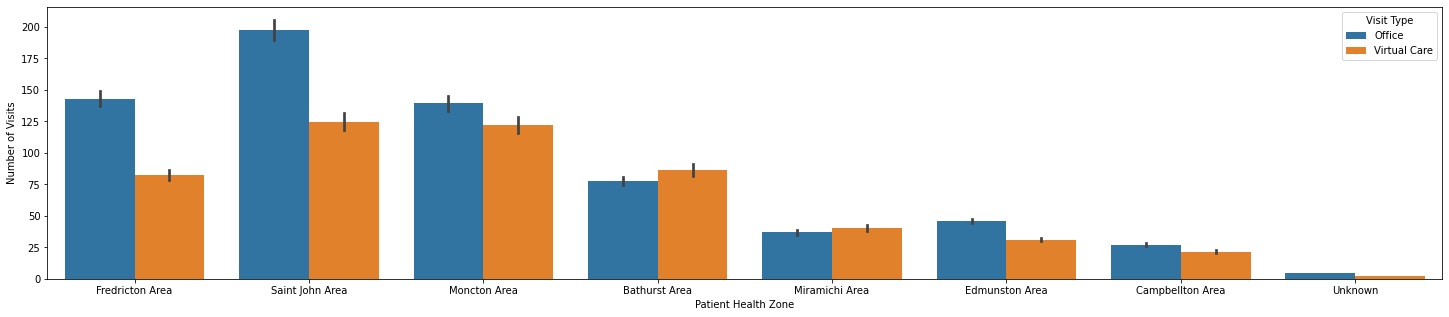

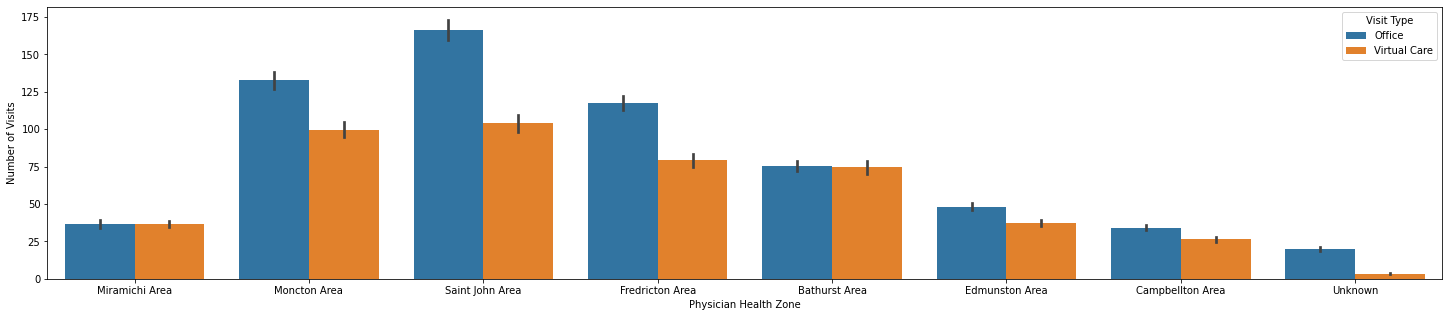

In [41]:
sns.barplot(x = 'Year', y = 'Number of Visits', hue = 'Visit Type', data = df)
#print(df.groupby(['Year', 'Visit Type']).mean()['Number of Visits'])
plt.show()

plt.figure(figsize=(25,5))
sns.barplot(x = 'Age Group (Patient)', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

sns.barplot(x = 'Patient Gender', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

sns.barplot(x = 'Physician Gender', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

plt.figure(figsize=(25,5))
sns.barplot(x = 'Patient Health Zone', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

plt.figure(figsize=(25,5))
sns.barplot(x = 'Physician Health Zone', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()



In [12]:
df_reg=pd.get_dummies(df,drop_first=True)
list(dummies.columns)


In [13]:
df_reg.to_csv('dummydata.csv',index=False)

In [14]:
x=df_reg.loc[:,df_reg.columns!="Number of Visits"]
y=df_reg["Number of Visits"]

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)


In [15]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x_train) # adding a constant
 
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) 
 
print_model = model.summary()
print(print_model)

regr.score(x_test,y_test)


                                 OLS Regression Results                                
Dep. Variable:       Number of Visits   R-squared (uncentered):                   0.206
Model:                            OLS   Adj. R-squared (uncentered):              0.206
Method:                 Least Squares   F-statistic:                              933.0
Date:                Fri, 04 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:47:13   Log-Likelihood:                     -5.4115e+05
No. Observations:               79240   AIC:                                  1.082e+06
Df Residuals:                   79218   BIC:                                  1.083e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

0.10160329865173079

In [16]:
#Logistic Regression Model

x=df_reg.loc[:,df_reg.columns!="Visit Type_Virtual Care"]
y=df_reg["Visit Type_Virtual Care"]

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [17]:
#Evaluate the model

p_pred = model.predict_proba(x_test)
y_pred = model.predict(x_test)
score_ = model.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print('x:', x, sep='\n')
#print('y:', y, sep='\n', end='\n\n')
#print('intercept:', model.intercept_)
#print('coef:', model.coef_, end='\n\n')
#print('p_pred:', p_pred, sep='\n', end='\n\n')
#print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')


score_: 0.6144400930479079

conf_m:
[[20867     0]
 [13094     0]]

report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     20867
           1       0.00      0.00      0.00     13094

    accuracy                           0.61     33961
   macro avg       0.31      0.50      0.38     33961
weighted avg       0.38      0.61      0.47     33961



/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ZainHaider/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

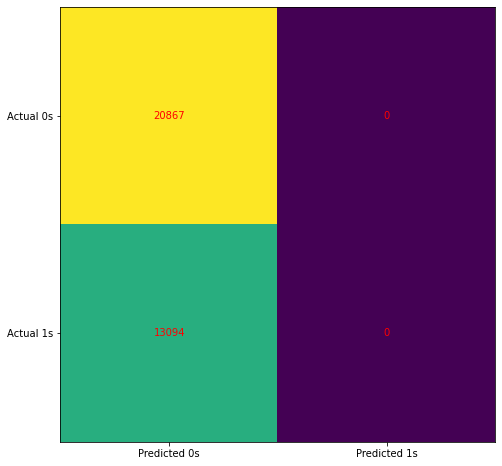

In [18]:
#Confusion Matrix

cm=confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()